In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib.colors as colors
from scipy.interpolate import UnivariateSpline
from scipy import interpolate
import scipy.stats
import itertools
import wquantiles as wq

In [18]:
input_file1 = "/mnt/home/micall12/LowEnergyNeuralNetwork/output_plots/L7_FLERCNN/prediction_training_sample.hdf5"
#input_file1 = "/mnt/home/micall12/LowEnergyNeuralNetwork/output_plots/PID_level6_cleanedpulses_IC19_E5to200_60000kmax_variableevtperbin_LRe-3DROPe-.5EPOCHS200/prediction_values_648epochs.hdf5"

f = h5py.File(input_file1, "r")
list(f.keys())
truth1 = f["Y_test_use"][:]
predict1 = f["Y_predicted"][:]
try:
    info1 = f["additional_info"][:]
except:
    info1 = None
try:
    weights1 = f["weights_test"][:]
except:
    weights1 = None
f.close()
del f

In [14]:
cnn_prob_track1 = np.array(predict1[:,:,0][0])
true_energy1 = np.array(truth1[:,0])*100
true_zenith1 = np.array(truth1[:,1])
true_azimuth1 = np.array(truth1[:,2])
true_coszenith1 = np.cos(true_zenith1)
true_x1 = np.array(truth1[:,4])
true_y1 = np.array(truth1[:,5])
true_z1 = np.array(truth1[:,6])
true_CC1 = np.array(truth1[:,11])
true_isCC1 = true_CC1 == 1
true_track1 = np.array(truth1[:,8])
true_isTrack1 = np.array(true_track1,dtype=bool)

In [8]:
weights1 = weights1[:,8]/numFiles

In [12]:
cnn_prob_mu1 = np.array(predict1[:,-1])
cnn_zenith1 = np.array(predict1[:,1])
cnn_prob_track1 = np.array(predict1[:,2])
cnn_x1 = np.array(predict1[:,3])
cnn_y1 = np.array(predict1[:,4])
cnn_z1 = np.array(predict1[:,5])
cnn_coszen1 = np.cos(cnn_zenith1)
cnn_energy1 = np.array(predict1[:,0])

true_energy1 = np.array(truth1[:,0])*efactor
true_zenith1 = np.array(truth1[:,1])
true_azimuth1 = np.array(truth1[:,2])
true_coszenith1 = np.cos(true_zenith1)
true_x1 = np.array(truth1[:,4])
true_y1 = np.array(truth1[:,5])
true_z1 = np.array(truth1[:,6])
true_CC1 = np.array(truth1[:,11])
true_isCC1 = true_CC1 == 1
true_track1 = np.array(truth1[:,8])
true_isTrack1 = np.array(true_track1,dtype=bool)

IndexError: too many indices for array

In [8]:
input_file2 = "/mnt/home/micall12/LowEnergyNeuralNetwork/output_plots/L7_FLERCNN/prediction_values_1201h_1401h_16.5h_1318k19k.hdf5"

f = h5py.File(input_file2, "r")
truth2 = f["Y_test_use"][:]
predict2 = f["Y_predicted"][:]
try:
    info2 = f["additional_info"][:]
except:
    info2 = None
try:
    weights2 = f["weights_test"][:]
except:
    weights2 = None
f.close()
del f

In [10]:
cnn_prob_mu2 = np.array(predict2[:,-1])
cnn_zenith2 = np.array(predict2[:,1])
cnn_prob_track2 = np.array(predict2[:,2])
cnn_x2 = np.array(predict2[:,3])
cnn_y2 = np.array(predict2[:,4])
cnn_z2 = np.array(predict2[:,5])
cnn_coszen2 = np.cos(cnn_zenith2)
cnn_energy2 = np.array(predict2[:,0])

true_energy2 = np.array(truth2[:,0])
true_zenith2 = np.array(truth2[:,1])
true_azimuth2 = np.array(truth2[:,2])
true_coszenith2 = np.cos(true_zenith2)
true_x2 = np.array(truth2[:,4])
true_y2 = np.array(truth2[:,5])
true_z2 = np.array(truth2[:,6])
true_CC2 = np.array(truth2[:,11])
true_isCC2 = true_CC2 == 1
true_track2 = np.array(truth2[:,8])
true_isTrack2 = np.array(true_track2,dtype=bool)

In [ ]:
plot_classification_hist(true_isNu,cnn_prob_nu,mask=all_cuts, mask_name=a_mask_name_here, 
                         units="",weights=weights,bins=50,log=True,save=save,
                         save_folder_name=save_folder,name_prob1 = "Neutrino", name_prob0 = "Muon",
                         notebook=True)

ROC(true_isNu,cnn_prob_nu,mask=all_cuts,mask_name=a_mask_name_here,save=save,
        save_folder_name=save_folder,variable="Probability Neutrino",notebook=True)

In [15]:
true_all = true_energy1 > 0
print(len(true_energy1),len(cnn_prob_track1),sum(true_all))

1095938 1095938 1095938


Masking, using 1.000000 of input
102798 993140 1095938
0.10474112261305481 0.8952588773869394
Events predicted to be track:  376207 number of true tracks there:  365928 number of true cascades there:  10279
1.0
Fraction of true tracks: 0.906


(49.552628, -29.956995010375977)

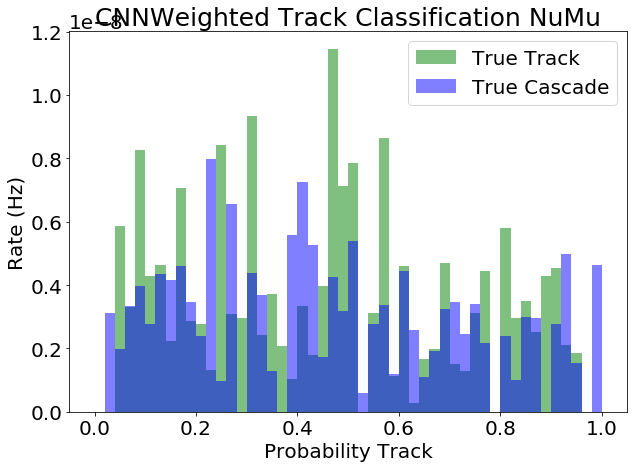

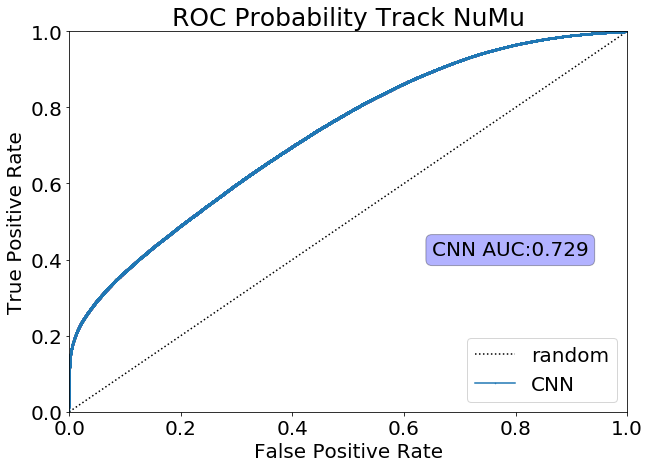

In [17]:

save = True
save_folder = "/mnt/home/micall12/LowEnergyNeuralNetwork/output_plots/PID_level6_cleanedpulses_IC19_E5to200_60000kmax_variableevtperbin_LRe-3DROPe-.5EPOCHS200/"
from PlottingFunctionsClassification import plot_classification_hist
from PlottingFunctionsClassification import ROC

plot_classification_hist(true_isTrack1,cnn_prob_track1,mask=true_all, mask_name="NuMu", 
                         units="",weights=weights1,bins=50,log=False,save=save,
                         save_folder_name=save_folder,name_prob1 = "Track", name_prob0 = "Cascade",
                         notebook=True)

ROC(true_isTrack1,cnn_prob_track1,mask=true_all,mask_name="NuMu",save=save,
        save_folder_name=save_folder,variable="Probability Track",notebook=True)

In [ ]:
plt.figure(figsize=(10,7))
emin = 0
emax = 500
bins = 10**(np.arange(0,2.7,0.1))
plt.hist(true_energy,range=[emin,emax],bins=bins,weights=weights)
plt.xlabel("True Energy (GeV)")
plt.title("True Energy Distribution")
plt.ylabel("Rate (Hz)")
plt.yscale("log")
plt.xscale("log")
plt.savefig("%sEnergyHist_Train.png"%(save_folder),bbox_inches='tight')
plt.close()


In [ ]:
plt.figure(figsize=(10,7))
emin = 0
emax = 500
bins = 10**(np.arange(0,2.7,0.1))
plt.hist(true_energy,range=[emin,emax],bins=bins,weights=weights)
plt.xlabel("True Energy (GeV)")
plt.title("True Energy Distribution")
plt.ylabel("Rate (Hz)")
plt.yscale("log")
plt.xscale("log")
plt.savefig("%sEnergyHist_Test.png"%(save_folder),bbox_inches='tight')
plt.close()